In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/pubchem_bioactivities_merged.csv")

### PAINS-like analysis

In the PAINS publication, a set of primary assays was declared where the entire set of compounds was tested against it. Inferences about promiscuity were made based on the proportion of active assays. To achieve this with this set, we should find a defined set of primary assays and compounds, where each compounds was tested in all of the assays.

Obviously, the more assays we use, the less compounds we'll have, so this is a matter of gauging this trade-off.

In [3]:
primary = df[df["Outcome Type"] == 1].copy()

In [4]:
aids = primary.groupby("AID").agg(compounds_tested = ("CID", "nunique")).reset_index()

In [5]:
aids = aids.sort_values(by="compounds_tested", ascending=False).reset_index()

In [6]:
cids_set = set()
aids_set = []
cids_counts = []
for index, row in tqdm(aids.iterrows()):
    aids_set.append(row["AID"])
    cids_tested = primary.loc[primary["AID"] == row["AID"], "CID"].unique()
    if index == 0:
        cids_set = set(cids_tested)
    else:
        cids_set = cids_set.intersection(cids_tested)
    print(f"assays: {index + 1}, cids: {len(cids_set)}")
    cids_counts.append(len(cids_set))

2it [00:00, 11.15it/s]

assays: 1, cids: 405115
assays: 2, cids: 405115


4it [00:00,  8.92it/s]

assays: 3, cids: 403573
assays: 4, cids: 394699


6it [00:00,  8.90it/s]

assays: 5, cids: 381968
assays: 6, cids: 340625


8it [00:00,  9.16it/s]

assays: 7, cids: 340625
assays: 8, cids: 340625


10it [00:01,  9.12it/s]

assays: 9, cids: 340625
assays: 10, cids: 340625


12it [00:01,  9.45it/s]

assays: 11, cids: 340625
assays: 12, cids: 340625
assays: 13, cids: 340625


15it [00:01,  9.67it/s]

assays: 14, cids: 340557
assays: 15, cids: 340557


17it [00:01,  9.54it/s]

assays: 16, cids: 340557
assays: 17, cids: 340557


19it [00:02,  9.30it/s]

assays: 18, cids: 340557
assays: 19, cids: 340557


21it [00:02,  9.42it/s]

assays: 20, cids: 340557
assays: 21, cids: 340557


23it [00:02,  9.50it/s]

assays: 22, cids: 340557
assays: 23, cids: 334927


25it [00:02,  9.20it/s]

assays: 24, cids: 334927
assays: 25, cids: 334927


27it [00:02,  9.17it/s]

assays: 26, cids: 334927
assays: 27, cids: 334927


29it [00:03,  8.92it/s]

assays: 28, cids: 334927
assays: 29, cids: 334927


31it [00:03,  8.98it/s]

assays: 30, cids: 334927
assays: 31, cids: 334927


33it [00:03,  9.20it/s]

assays: 32, cids: 334927
assays: 33, cids: 334926


35it [00:03,  9.33it/s]

assays: 34, cids: 334926
assays: 35, cids: 334926


37it [00:03,  9.35it/s]

assays: 36, cids: 334926
assays: 37, cids: 332765
assays: 38, cids: 298341


41it [00:04, 10.40it/s]

assays: 39, cids: 298341
assays: 40, cids: 298341
assays: 41, cids: 298341


43it [00:04, 10.67it/s]

assays: 42, cids: 298341
assays: 43, cids: 298341
assays: 44, cids: 298341


47it [00:04, 10.77it/s]

assays: 45, cids: 298341
assays: 46, cids: 298341
assays: 47, cids: 298341


49it [00:05, 10.83it/s]

assays: 48, cids: 298341
assays: 49, cids: 298341
assays: 50, cids: 298340


53it [00:05, 10.83it/s]

assays: 51, cids: 293969
assays: 52, cids: 293969
assays: 53, cids: 293969


55it [00:05, 11.07it/s]

assays: 54, cids: 287044
assays: 55, cids: 283211
assays: 56, cids: 279417


59it [00:05, 11.49it/s]

assays: 57, cids: 268114
assays: 58, cids: 255065
assays: 59, cids: 238858


61it [00:06, 11.58it/s]

assays: 60, cids: 236027
assays: 61, cids: 236027
assays: 62, cids: 236027


65it [00:06, 12.00it/s]

assays: 63, cids: 235970
assays: 64, cids: 235970
assays: 65, cids: 235970


67it [00:06, 12.11it/s]

assays: 66, cids: 235970
assays: 67, cids: 235957
assays: 68, cids: 221931


71it [00:06, 12.04it/s]

assays: 69, cids: 221679
assays: 70, cids: 221067
assays: 71, cids: 221065


73it [00:07, 12.28it/s]

assays: 72, cids: 221065
assays: 73, cids: 221065
assays: 74, cids: 221065


77it [00:07, 11.99it/s]

assays: 75, cids: 221065
assays: 76, cids: 221065
assays: 77, cids: 221065


79it [00:07, 11.89it/s]

assays: 78, cids: 221065
assays: 79, cids: 221065
assays: 80, cids: 217170


83it [00:07, 12.17it/s]

assays: 81, cids: 214488
assays: 82, cids: 214488
assays: 83, cids: 214488


85it [00:08, 12.18it/s]

assays: 84, cids: 214477
assays: 85, cids: 214477
assays: 86, cids: 214477


89it [00:08, 12.47it/s]

assays: 87, cids: 214449
assays: 88, cids: 213978
assays: 89, cids: 210326


91it [00:08, 12.41it/s]

assays: 90, cids: 209830
assays: 91, cids: 202361
assays: 92, cids: 199827


95it [00:08, 12.65it/s]

assays: 93, cids: 199827
assays: 94, cids: 199827
assays: 95, cids: 199827


97it [00:09, 12.75it/s]

assays: 96, cids: 199827
assays: 97, cids: 199827
assays: 98, cids: 199827


101it [00:09, 12.70it/s]

assays: 99, cids: 199827
assays: 100, cids: 199827
assays: 101, cids: 199827


103it [00:09, 12.68it/s]

assays: 102, cids: 197325
assays: 103, cids: 194132
assays: 104, cids: 189913


107it [00:09, 12.81it/s]

assays: 105, cids: 189913
assays: 106, cids: 189913
assays: 107, cids: 189913


109it [00:09, 13.04it/s]

assays: 108, cids: 184361
assays: 109, cids: 173643
assays: 110, cids: 167633


113it [00:10, 13.63it/s]

assays: 111, cids: 161187
assays: 112, cids: 161187
assays: 113, cids: 160268


115it [00:10, 13.74it/s]

assays: 114, cids: 160268
assays: 115, cids: 160268
assays: 116, cids: 160268


119it [00:10, 13.77it/s]

assays: 117, cids: 160268
assays: 118, cids: 158123
assays: 119, cids: 157895


123it [00:10, 14.66it/s]

assays: 120, cids: 148468
assays: 121, cids: 131624
assays: 122, cids: 123402
assays: 123, cids: 123347


127it [00:11, 15.82it/s]

assays: 124, cids: 123312
assays: 125, cids: 110705
assays: 126, cids: 106854
assays: 127, cids: 74962


132it [00:11, 18.09it/s]

assays: 128, cids: 67132
assays: 129, cids: 37623
assays: 130, cids: 37319
assays: 131, cids: 35611
assays: 132, cids: 34575


135it [00:11, 19.20it/s]

assays: 133, cids: 15223
assays: 134, cids: 15174
assays: 135, cids: 14689
assays: 136, cids: 14688
assays: 137, cids: 14687


141it [00:11, 21.12it/s]

assays: 138, cids: 14682
assays: 139, cids: 14682
assays: 140, cids: 14682
assays: 141, cids: 14682
assays: 142, cids: 14566


147it [00:12, 22.44it/s]

assays: 143, cids: 14341
assays: 144, cids: 14103
assays: 145, cids: 14083
assays: 146, cids: 13441
assays: 147, cids: 13244


150it [00:12, 22.92it/s]

assays: 148, cids: 11480
assays: 149, cids: 11480
assays: 150, cids: 11480
assays: 151, cids: 11480
assays: 152, cids: 11480
assays: 153, cids: 11480


159it [00:12, 24.36it/s]

assays: 154, cids: 11480
assays: 155, cids: 11438
assays: 156, cids: 11438
assays: 157, cids: 11438
assays: 158, cids: 11438
assays: 159, cids: 11431


162it [00:12, 24.66it/s]

assays: 160, cids: 11404
assays: 161, cids: 11383
assays: 162, cids: 11383
assays: 163, cids: 11382
assays: 164, cids: 11341
assays: 165, cids: 11240


172it [00:13, 27.31it/s]

assays: 166, cids: 10025
assays: 167, cids: 8857
assays: 168, cids: 4366
assays: 169, cids: 1384
assays: 170, cids: 1384
assays: 171, cids: 1384
assays: 172, cids: 1384


180it [00:13, 31.69it/s]

assays: 173, cids: 1057
assays: 174, cids: 317
assays: 175, cids: 7
assays: 176, cids: 6
assays: 177, cids: 6
assays: 178, cids: 6
assays: 179, cids: 6
assays: 180, cids: 6


188it [00:13, 33.99it/s]

assays: 181, cids: 6
assays: 182, cids: 6
assays: 183, cids: 6
assays: 184, cids: 6
assays: 185, cids: 6
assays: 186, cids: 6
assays: 187, cids: 6
assays: 188, cids: 6


192it [00:13, 35.02it/s]

assays: 189, cids: 6
assays: 190, cids: 6
assays: 191, cids: 6
assays: 192, cids: 5
assays: 193, cids: 5
assays: 194, cids: 5
assays: 195, cids: 5
assays: 196, cids: 5
assays: 197, cids: 5


205it [00:13, 36.59it/s]

assays: 198, cids: 5
assays: 199, cids: 5
assays: 200, cids: 5
assays: 201, cids: 5
assays: 202, cids: 5
assays: 203, cids: 5
assays: 204, cids: 5
assays: 205, cids: 5


209it [00:14, 35.20it/s]

assays: 206, cids: 5
assays: 207, cids: 5
assays: 208, cids: 5
assays: 209, cids: 5
assays: 210, cids: 5
assays: 211, cids: 5


217it [00:14, 29.35it/s]

assays: 212, cids: 5
assays: 213, cids: 5
assays: 214, cids: 5
assays: 215, cids: 5
assays: 216, cids: 0
assays: 217, cids: 0


221it [00:14, 27.51it/s]

assays: 218, cids: 0
assays: 219, cids: 0
assays: 220, cids: 0
assays: 221, cids: 0
assays: 222, cids: 0


227it [00:14, 24.30it/s]

assays: 223, cids: 0
assays: 224, cids: 0
assays: 225, cids: 0
assays: 226, cids: 0
assays: 227, cids: 0


230it [00:14, 22.38it/s]

assays: 228, cids: 0
assays: 229, cids: 0
assays: 230, cids: 0
assays: 231, cids: 0


233it [00:15, 20.74it/s]

assays: 232, cids: 0
assays: 233, cids: 0
assays: 234, cids: 0
assays: 235, cids: 0


238it [00:15, 18.65it/s]

assays: 236, cids: 0
assays: 237, cids: 0
assays: 238, cids: 0
assays: 239, cids: 0


243it [00:15, 19.04it/s]

assays: 240, cids: 0
assays: 241, cids: 0
assays: 242, cids: 0
assays: 243, cids: 0


247it [00:15, 19.05it/s]

assays: 244, cids: 0
assays: 245, cids: 0
assays: 246, cids: 0
assays: 247, cids: 0


252it [00:16, 19.56it/s]

assays: 248, cids: 0
assays: 249, cids: 0
assays: 250, cids: 0
assays: 251, cids: 0
assays: 252, cids: 0


255it [00:16, 19.80it/s]

assays: 253, cids: 0
assays: 254, cids: 0
assays: 255, cids: 0
assays: 256, cids: 0


258it [00:16, 15.65it/s]

assays: 257, cids: 0
assays: 258, cids: 0


In [29]:
data_point_count = [(assay_count + 1) * compounds_count for assay_count, compounds_count in enumerate(cids_counts)]

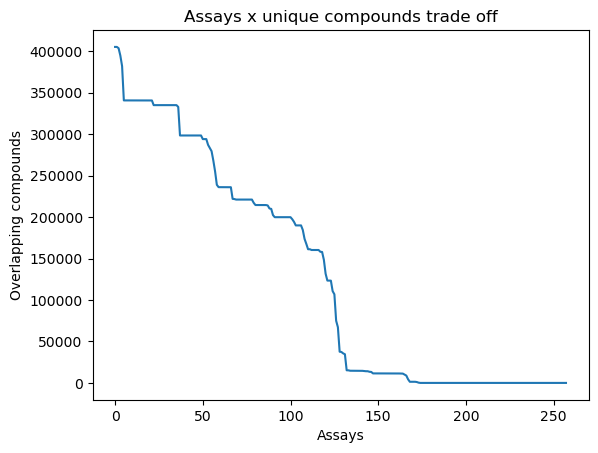

In [30]:
plt.plot(cids_counts)
plt.title('Assays x unique compounds trade off')
plt.xlabel('Assays')
plt.ylabel('Overlapping compounds')
plt.show()

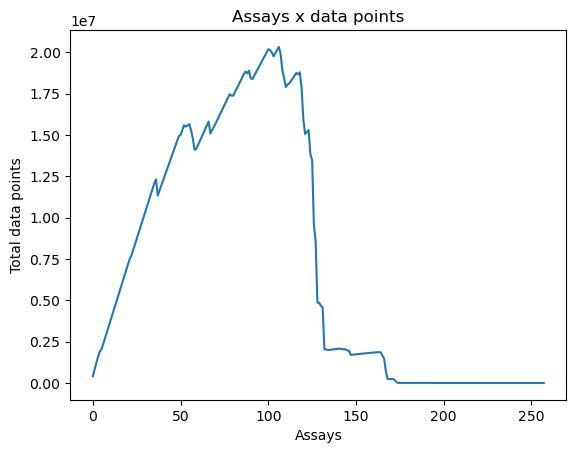

In [31]:
plt.plot(data_point_count)
plt.title('Assays x data points')
plt.xlabel('Assays')
plt.ylabel('Total data points')
plt.show()

In [32]:
data_point_count.index(max(data_point_count))

106

The set is the biggest at 106 assays, let's go with that

In [43]:
aids_106 = aids_set[0:106]

In [44]:
primary_106 = primary[primary["AID"].isin(aids_106)].copy()

In [48]:
all_cids = primary_106.groupby("CID").agg(aid_count = ("AID", "nunique")).reset_index()

In [49]:
cids_106 = all_cids.loc[all_cids["aid_count"] == 106, "CID"]

In [50]:
primary_106 = primary_106[primary_106["CID"].isin(cids_106)].copy()

In [52]:
primary_106

,AID,CID,active,Outcome Type,target_family,panther_family
17017622,2174,644422,False,1,0,78
17017623,2174,644380,False,1,0,78
17017624,2174,647663,False,1,0,78
17017625,2174,293372,False,1,0,78
17017626,2174,6602571,False,1,0,78
...,...,...,...,...,...,...
68288351,1346378,3332664,False,1,3,217
68288358,1346378,3336052,False,1,3,217
68288360,1346378,3338091,False,1,3,217
68288364,1346378,3342390,False,1,3,217


In [61]:
primary_106 = primary_106.groupby(["CID", "AID"]).agg(
    active = ("active", "max") 
).reset_index()

In [63]:
cid_activity = primary_106.groupby("CID").agg(
    hits = ("active", "sum")
).reset_index()

In [65]:
from scripts.visualizations import plot_histogram

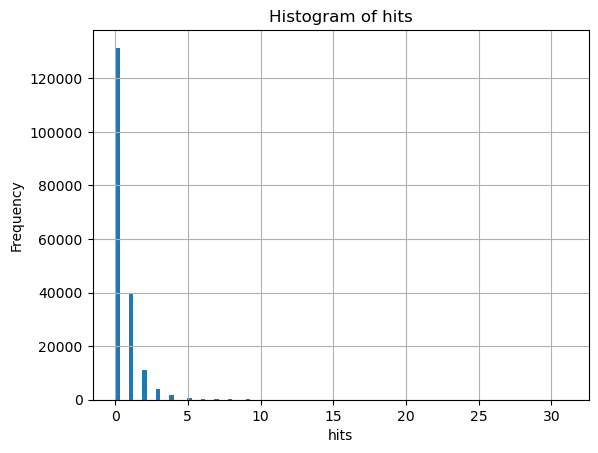

In [83]:
plot_histogram(cid_activity, "hits")

In [70]:
cid_activity = cid_activity.sort_values(by = "hits", ascending=False)

In [76]:
global_hit_rate = primary_106["active"].mean()
global_hit_rate

0.004712485528378486

In [77]:
from scipy.stats import binom

In [80]:
cid_activity["probability"] = 1 - binom.pmf(cid_activity["hits"], 106, global_hit_rate)

In [100]:
counts = []
prev_val = 0
for i in range(cid_activity["hits"].max(), -1, -1):
    cur_val = len(cid_activity[cid_activity["hits"] == i])
    counts.append(prev_val + cur_val)
    prev_val += cur_val

In [110]:
cumsum = pd.DataFrame(counts).reset_index().rename(columns={"index" : ">= x hits", 0:"compounds"})

In [111]:
cumsum[">= x hits"] = 31 - cumsum[">= x hits"] 

In [112]:
print(cumsum.to_string())

    >= x hits  compounds
0          31          1
1          30          1
2          29          2
3          28          4
4          27          5
5          26          6
6          25          6
7          24          9
8          23         12
9          22         16
10         21         20
11         20         32
12         19         43
13         18         55
14         17         61
15         16         71
16         15         90
17         14        103
18         13        126
19         12        158
20         11        204
21         10        270
22          9        359
23          8        532
24          7        767
25          6       1201
26          5       1989
27          4       3681
28          3       7734
29          2      18805
30          1      58503
31          0     189913
